<h1>
<center>Titanic Dataset Analysis - II</center>
<center>

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Overview

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use <font color = "blue">feature engineering</font> to create new features.

The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

|<h3>**Variable**</h3>|<h3>**Definition**</h3>|<h3>**Key**</h3>|
|:-|:-|:-|
|PassengerId|Unique Identifier of each passenger||
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name of Passenger||
|Sex|Gender||
|Age|Age in years||
|SibSp|# of siblings / spouses aboard the Titanic||
|Parch|# of parents / children aboard the Titanic||
|Ticket|Ticket number||
|Fare|Passenger fare||
|Cabin|Cabin number||
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

* Detail of some of the variables is provided. You need to explore rest of the varibles yourself.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

#### Read Data

In [2]:
train = pd.read_csv('train.csv')

#### Drop Irrelevant Attributes

In your initial analysis, you must have noticed that there were some attributes that did not play any role in prediction. Therefore, we would remove these attributes.

In [3]:
train.drop(['PassengerId', 'Ticket' ], axis=1, inplace=True)

#### Current Data

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Feature Engineering

Yes 'Name' and 'Cabin' seems to be irrelevant but we are not going to remove them yet. There is no need to be confused or surprised, as we are going to introduce a new concept called <font color='blue'>Feature Engineering.</font>

**Feature engineering** is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

**What do experts say about Feature Engineering?**

* *feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success. […] Much of the success of machine learning is actually success in engineering features that a learner can understand.* 

— Scott Locklin, in “Neglected machine learning ideas”

* *Actually the success of all Machine Learning algorithms depends on how you present the data.*

— Mohammad Pezeshki, answer to “What are some general tips on feature selection and engineering that every data scientist should know?”

* *The algorithms we used are very standard for Kagglers. […]  We spent most of our efforts in feature engineering.*

— Xavier Conort, on “Q&A with Xavier Conort” on winning the Flight Quest challenge on Kaggle

* *“At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.”*

— Prof. Pedro Domingos

**But what really is Feature Engineering?**

I believe that the best way to understand something new is simply by doing it. <br>For further readings you can see references or find some very good material online.



#### Attribute = Name

In [5]:
###
### Print all names in column 'Name'
### Write your code here
###
df=train
#train['Name']

In [6]:
###
### With every name of passenger you would find an extra title i.e Mr., Mrs., Miss. and e.t.c.
### Go ahead and take a deeper look at the name of passengers.
###
### I suspect that this title might be informative
### Create a new column with name 'title' and store the title of each passenger
### You might have to write a regular expression for extracting title from names.
###
import re
df['Title']=df['Name'].str.extract(r'(M\w\w\w\.|M\w\.|Mr\w\.|Maste\w\.|Re\w\.|Do\w\.|D\w\.|Mll\w\.|Co\w\.|Ms\. )')
df.head(714)

###


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,Mr.
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,Mr.
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,Master.
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S,Mrs.
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C,Mrs.


In [7]:
###
### Some of the titles might be very rare i.e only 1 or 2 passengers
### Group all such variables into one category 'Rare' and print all the unique entries in the column 'Title'
### Now the title attribute would have categories like Mr, Miss, Rare
###
### Write your code here


df["Title"] = df["Title"].replace('Mr.', 'Mr')
df["Title"] = df["Title"].replace('Master.', 'Mr')
df["Title"] = df["Title"].replace('Miss.', 'Miss')
df["Title"] = df["Title"].replace('Mrs.', 'Miss')
df["Title"] = df["Title"].replace('Ms.', 'Miss')
df["Title"] = df["Title"].replace('Rev.', 'Rare')
df["Title"] = df["Title"].replace('Don.', 'Rare')
df["Title"] = df["Title"].replace('Dr.', 'Rare')
df["Title"] = df["Title"].replace('Mlle.', 'Rare')
df["Title"] = df["Title"].replace('Col.', 'Rare')

df.head(650)
###

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C85,C,Miss
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,C123,S,Miss
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,NaN,S,Mr
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,E46,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,NaN,S,Mr
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,NaN,S,Miss
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,NaN,C,Miss


In [8]:
###
### Finally drop the 'Name' column from dataframe
### Write your code here
del df['Name']
###

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Miss
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Miss
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
5,0,3,male,NaN,0,0,8.4583,NaN,Q,Mr
6,0,1,male,54.0,0,0,51.8625,E46,S,Mr
7,0,3,male,2.0,3,1,21.0750,NaN,S,Mr
8,1,3,female,27.0,0,2,11.1333,NaN,S,Miss
9,1,2,female,14.0,1,0,30.0708,NaN,C,Miss


#### Members of family

In [10]:
###
### SibSp represents # of siblings/spouses aboard the ship
### Parch represents # of parents/children aboard the titanic
###
### If we add these two variables we can get the family size of each passenger.
### Create a new variable called 'Members' by adding SibSp and Parch for each passenger
### 
### Write your code here
df['Members'] = df['SibSp'] + df['Parch']
###

In [11]:
#df

In [12]:
### 
### If the count add up to zero it means the person is travelling alone else not.
### Create a new boolean column called 'Alone'
### It would be 1 if the passenger is travelling alone else 0.
###
### Write your code here
df['ALone'] = (df['Members'] == 0).astype(int)
###

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Members,ALone
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,1,0
1,1,1,female,38.0,1,0,71.2833,C85,C,Miss,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,Miss,1,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,0,1
5,0,3,male,NaN,0,0,8.4583,NaN,Q,Mr,0,1
6,0,1,male,54.0,0,0,51.8625,E46,S,Mr,0,1
7,0,3,male,2.0,3,1,21.0750,NaN,S,Mr,4,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,Miss,2,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,Miss,1,0


#### Age

In [14]:
###
### In the first Homework you might have replaced missing values with mean of column.
### It is absolutely fine to use the mean. 
### However, an alternative approach could be to replace using grouping.
### For example, we would group all males and females and take their mean separately
### Now we would check that if the passenger is male we would replace it's missing age with male's mean and vice versa.
###
### Implement the above strategy for replacing missing age values
###
### Write your code here
df2=df
df3=df

grouped = df2.groupby('Sex')

for index, row in df3.iterrows():
    if (row['Sex']=="male" and np.isnan(row['Age'])):
        df3["Age"].fillna(30.72 , inplace=True)
    elif (row['Sex']=="female" and np.isnan(row['Age'])):
        df3["Age"].fillna(27.91, inplace=True)

df4=df3
df6=df3
df7=df3.copy(deep=True)
df8=df3.copy(deep=True)
df9=df3.copy(deep=True)
df4
###

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Members,ALone
0,0,3,male,22.00,1,0,7.2500,NaN,S,Mr,1,0
1,1,1,female,38.00,1,0,71.2833,C85,C,Miss,1,0
2,1,3,female,26.00,0,0,7.9250,NaN,S,Miss,0,1
3,1,1,female,35.00,1,0,53.1000,C123,S,Miss,1,0
4,0,3,male,35.00,0,0,8.0500,NaN,S,Mr,0,1
5,0,3,male,30.72,0,0,8.4583,NaN,Q,Mr,0,1
6,0,1,male,54.00,0,0,51.8625,E46,S,Mr,0,1
7,0,3,male,2.00,3,1,21.0750,NaN,S,Mr,4,0
8,1,3,female,27.00,0,2,11.1333,NaN,S,Miss,2,0
9,1,2,female,14.00,1,0,30.0708,NaN,C,Miss,1,0


#### Has Cabin

In [15]:
###
### Remove the column 'Cabin'
del df4['Cabin']
df4.describe()
###

,Survived,Pclass,Age,SibSp,Parch,Fare,Members,ALone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.901919,0.523008,0.381594,32.204208,0.904602,0.602694
std,0.486592,0.836071,13.008401,1.102743,0.806057,49.693429,1.613459,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,30.720000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


Probably now you would have more features then before. Feature Engineering is an art, coming up with meaningful features is a big skill and comes by domain knowledge and practice.
* You are free to play around and come up with your own features such that they are also useful in prediction.

### Pre-processing on Numeric Data

#### Transformations

A variable transformation refers to a transformation that is applied to all the values of a variable. For example, if only the magnitude of a variable is important, then the values of the variable can be transformed by taking the absolute value. If $x$ is a variable, then examples of such transformations include $x^k$, $log(x)$, $e^x$, $\sqrt{x}$ and others.


#### Standardization

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$, where $\mu$ is the mean (average) and $\sigma$ is the standard deviation;

Standard scores (also called z scores) of the samples are calculated as follows:

$$z = \frac{x-\mu}{\sigma}$$

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates.

#### Normalization

An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “Min Max Normalization”).
In this approach, the data is scaled to a fixed range - usually 0 to 1.

A Min-Max scaling is typically done via the following equation:

$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

#### Discretization

Discretization(binning) is an unsupervised method that transforms numerical variable into categorical counterparts but do not use the target (class) information. Equal Width and Equal Frequency are two unsupervised binning methods.

 		
##### 1- Equal Width Binning
The algorithm divides the data into $k$ intervals of equal size. The width of intervals is:		
$$ w = \frac{max-min}{k}$$

And the interval boundaries are:	

$$ min+w, min+2w, ... , min+(k-1)w $$

##### 2- Equal Frequency Binning
The algorithm divides the data into $k$ groups which each group contains approximately same number of values. For the both methods, the best way of determining $k$ is by looking at the histogram and try different intervals or groups.	

In [16]:
def gaussian_transform( data ):
    """
    There are some special transformations that convert a Non-Gaussian Distribution to Gaussian Distribution.
    Implement the function gaussian_transform that takes as input a numeric array and converts it to gaussian.
    Do not use any built-in library. You have to implement this function yourself.
    """
    mean=np.mean(data)
    std=np.std(data)
    a=((np.sqrt(2*3.14))*std)
    b= -(data-mean)**2
    c=(std**2)*2
    d=(2.718**(b/c))
    gaussian=d/a
    return gaussian

#gaussian_transform( df4['Age'] )


In [17]:
def standardize( data ):
    """
    Implement the function standardize that takes as input a numeric array and returns it's standardize version.
    Do not use any built-in library. You have to implement this function yourself.
    """
    mean=np.mean(data)
    std=np.std(data)
    a=data-mean
    standardize=a/std
    return standardize
#standardize( df4['Age'] )

In [18]:
def normalize( data ):
    """
    Implement the function normalize that takes as input a numeric array and returns it's normalized version.
    Do not use any built-in library. You have to implement this function yourself.
    """
    minimum = np.min(df4['Age'])
    maximum = np.max(df4['Age'])
    normalize=(data-minimum)/(maximum-minimum)
    return normalize
#normalize (df4['Age'] )

In [19]:
def discretize( data,k,method ):
    if method=='equal_frequency':
        frequency=len(data)/k
        X=data.copy()
        X=X.sort_values()
        bin=[]
        count=0
        for i in range(0,k):
            list=[]
            for j in range(0,math.ceil(frequency)-1):
                list.append(X.iat[count])
                count=count+1
            bin.append(list)
        return bin
    elif method=='equal_width':
        size=(max(data)-min(data))/k
        orignal_size=math.ceil(size)
        bin=[]
        x=0
        size=math.ceil(size)
        ranges=[]
        for i in range(0,k+1):
            ranges.append(x)
            x=x+orignal_size  
        for i in range(0,k):
            list=[]
            for j in range(0,len(data)):
                if (data[j]<=ranges[i+1] and data[j]>ranges[i]):
                    list.append(data[j])
            bin.append(list)
        return bin



In [20]:
### Test Pre-processing

### Use the age variable as input.
### Test the functions normalize(), standardize() and discretize()
### Display your result in the form of graphs
### 1 - plot a graph for original age
### 2 - plot a graph for gaussian transformed age
### 3 - plot a graph for standardized age
### 4 - plot a graph for normalized age
### 5 - plot a graph for discretized age with equal_width
### 6 - plot a graph for discretized age with equal_frequency

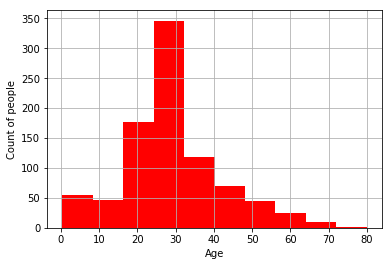

In [21]:
df4['Age'].hist(color = "red")
plt.xlabel("Age")
plt.ylabel("Count of people")
plt.show()

<BarContainer object of 891 artists>

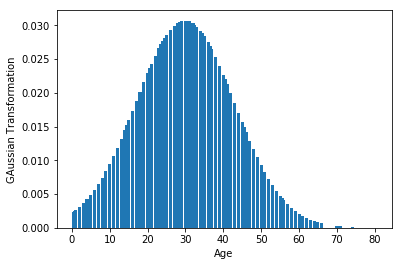

In [22]:
y=gaussian_transform( df4['Age'] )
plt.xlabel("Age")
plt.ylabel("GAussian Transformation")
plt.bar(df4['Age'],y)

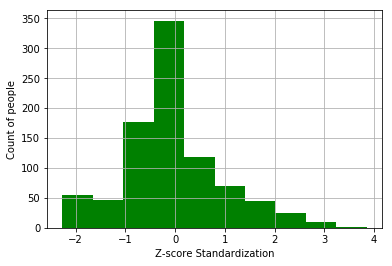

In [23]:
standardize( df4['Age'] ).hist(color='green')
plt.xlabel("Z-score Standardization")
plt.ylabel("Count of people")
plt.show()

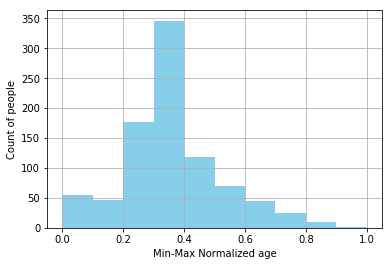

In [24]:
normalize (df4['Age'] ).hist(color='skyblue')
plt.xlabel("Min-Max Normalized age")
plt.ylabel("Count of people")
plt.show()

#### Encoding

In [25]:
### 
### Encode your categorical/strings data to numeric format
### Do not use any built-in library
### Write your code here
df6["Title"].replace('Mr', 1,inplace=True)
df6["Title"].replace('Miss', 2,inplace=True)
df6["Title"].replace('Rare', 3,inplace=True)
df6['Sex'].replace('male',1,inplace=True)
df6['Sex'].replace('female',0,inplace=True)
df6['Embarked'].replace('S',1,inplace=True)
df6['Embarked'].replace('C',2,inplace=True)
df6['Embarked'].replace('Q',3,inplace=True)

df6.head(20)
###

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Members,ALone
0,0,3,1,22.00,1,0,7.2500,1.0,1.0,1,0
1,1,1,0,38.00,1,0,71.2833,2.0,2.0,1,0
2,1,3,0,26.00,0,0,7.9250,1.0,2.0,0,1
3,1,1,0,35.00,1,0,53.1000,1.0,2.0,1,0
4,0,3,1,35.00,0,0,8.0500,1.0,1.0,0,1
5,0,3,1,30.72,0,0,8.4583,3.0,1.0,0,1
6,0,1,1,54.00,0,0,51.8625,1.0,1.0,0,1
7,0,3,1,2.00,3,1,21.0750,1.0,1.0,4,0
8,1,3,0,27.00,0,2,11.1333,1.0,2.0,2,0
9,1,2,0,14.00,1,0,30.0708,2.0,2.0,1,0


#### Correlation

In [26]:
def correlation( attribute_1, attribute_2 ):
    """
    Implement the function correlation that takes as input 2 numeric variables and calculates correlation between them.
    Use Pearson Correlation - The one which you studied in class
    Do not use built in libraries
    """
    A=attribute_1
    B=attribute_2
    
    A_mean=A.mean()
    A_std=A.std()
    
    B_mean=B.mean()
    B_std=B.std()
    
    n=A.count()
    sigma=0

    for i in range(n):
        corelation=((A[i]-A_mean)*(B[i]-B_mean))
        sigma=corelation+sigma   
        
    corelation=sigma/((n-1)*(A_std)*(B_std))
    
    
    return corelation

In [28]:
pclass=correlation( df6['Survived'] , df6['Pclass'] )
age=correlation( df6['Survived'] , df6['Age'] )
sibsip=correlation( df6['Survived'] , df6['SibSp'] )
parch=correlation( df6['Survived'] , df6['Parch'] )
fare=correlation( df6['Survived'] , df6['Fare'] )
members=correlation( df6['Survived'] , df6['Members'] )
alone=correlation( df6['Survived'] , df6['ALone'] )
sex=correlation( df6['Survived'] , df6['Sex'] )

print(pclass , age , sibsip , parch , fare , members , alone , sex)

-0.33848103596101586 -0.07266271933006614 -0.03532249888573589 0.08162940708348222 0.2573065223849618 0.01663898928274531 -0.2033670856998897 -0.5433513806577526


In [29]:
###
### Calculate correlation between all the attributes and target class
### If you have 10 attributes and 1 class
### You should have 10 correlation values
### Arrange these values, such that attributes with high correlation come at top
### Write your code here
ls=[pclass , age , sibsip , parch , fare , members , alone, sex]
sorted(ls , reverse=True)
###

[0.2573065223849618,
 0.08162940708348222,
 0.01663898928274531,
 -0.03532249888573589,
 -0.07266271933006614,
 -0.2033670856998897,
 -0.33848103596101586,
 -0.5433513806577526]

#### Implement Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Advantages: 
    
* Decision Trees are very flexible, and expressive classifiers.
* They can accommodate any kind of data i.e numeric, categorical and e.t.c.
* They can accommodate any number of classes,they are inherently multi-class
* Most importantly, they are **extremely interpretable**

Disadvantages:

* Prone to over-fitting

Last time we built a decision tree and saw some of it's advantages. This time we will dig deep further into decision trees, there disadvantages and how to handle them.

#### Train-Test Split

In [30]:
df6.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       8
Members     0
ALone       0
dtype: int64

In [31]:
df6.fillna(1,inplace=True)

In [32]:
###
### Before you train your model, split the data in training and testing set. 
### You are not to use any built-in library. 
### Keep approximately 80:20 train:test split ratio
###

X_train=df6.iloc[0:712, [1,2,3,4,5,6,7,8,9,10]].astype(int)
Y_train=df6.iloc[0:712, [0]]
X_test=df6.iloc[712:891, [1,2,3,4,5,6,7,8,9,10]].astype(int)
Y_test=df6.iloc[712:891, [0]]


#### Modeling

In [33]:
###
### Using sklearn
### Train a simple decision Tree Classifier on training data
### Use default settings and do not change any parameters of the module
### 
### Write your code here
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

###

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
training_predictions_classification_tree = classifier.predict(X_train)
testing_predictions_classification_tree = classifier.predict(X_test)


In [35]:
###
### Report your accuracy for training set and testing set both
### i.e. 
### Training Accuracy = ???
### Testing Accuracy = ???
print('Training Acc: ',accuracy_score(Y_train, classifier.predict(X_train)))
print('Testing Acc: ',accuracy_score(Y_test, classifier.predict(X_test)))
###

Training Acc:  0.9691011235955056
Testing Acc:  0.7932960893854749


**Question)** Did feature engineering improve accuracy of your model? You can compare your results from last notebook. Report your results.

Yes , as compare to last time my results are highly improved.
Last time I was using random 70%-30% ratio for test and train samples so every time I got different results for accuracy.Now I have fixed the samples for testing and training which improved my classifier working
Changing all type of attributes to numerical format is a good technique to utilize them in prediction.

#### Over-fitting

Over-fitting and under-fitting are common problems you would encounter in the world of machine learning.



I hope you have studied over-fitting in class and would have explored yourself as well. Just to give you intuition:

* Under-fitting is when you do not try at all to classify data properly.
* Optimum solution is what you are looking for.
* Over-fitting is when you try too hard to classify the data.


Not to worry if you still have issues understanding over-fitting. This concept would be popping up from time to time.<br>
So, let's end theoretical discussion and see over-fitting in action on decision trees.

#### Criterion Parameter For Decision Tree

In [36]:
###
### In the DecisionTreeClassifier() module there is a paramter called criterion - gini/entropy
### We will alter this parameter to see how training and testing accuracy varies.
### Leave rest of the parameters to default
### 
### Train separately two decision tree classifiers on gini and entropy.
### 
### For each Classifier report training and testing accuracy.
###
### Write your code here
classifier_gini = DecisionTreeClassifier(criterion='gini')
classifier_gini.fit(X_train, Y_train)
training_predictions = classifier_gini.predict(X_train)
predictions = classifier_gini.predict(X_test)
print('Training Acc: ',accuracy_score(Y_train, classifier_gini.predict(X_train)))
print('Testing Acc: ',accuracy_score(Y_test, classifier_gini.predict(X_test)))
###

Training Acc:  0.9691011235955056
Testing Acc:  0.7988826815642458


In [37]:
classifier_entropy = DecisionTreeClassifier(criterion='gini')
classifier_entropy.fit(X_train, Y_train)
training_predictions = classifier_entropy.predict(X_train)
predictions = classifier_entropy.predict(X_test)
print('Training Acc: ',accuracy_score(Y_train, classifier_entropy.predict(X_train)))
print('Testing Acc: ',accuracy_score(Y_test, classifier_entropy.predict(X_test)))

Training Acc:  0.9691011235955056
Testing Acc:  0.7988826815642458


In [38]:
### 
### Compare the results of using different criterion
###

#### Max Leaf Nodes Parameter in Decision Tree

In [39]:
###
### In the DecisionTreeClassifier() module there is a paramter called max_leaf_nodes
### We will alter this parameter to see how training and testing accuracy varies.
### Leave rest of the parameters to default
### 
### Train several decision tree classifiers on different values of max_leaf_nodes.
### Remember the minimum value of max_leaf_nodes is 2 and max is infinity.
### You could start from 2, 5, 10, 20, 30, 40 or any order you think is suitable.
### 
### For each Classifier report training and testing accuracy.
### Save these values in two separate lists
###
### Write your code here
###

In [40]:
classifier = DecisionTreeClassifier(max_leaf_nodes=2)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_2=accuracy_score(Y_train, classifier.predict(X_train))
test_2=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_2)
print('Testing Acc: ',test_2)

Training Acc:  0.7837078651685393
Testing Acc:  0.7988826815642458


In [41]:
classifier = DecisionTreeClassifier(max_leaf_nodes=5)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_5=accuracy_score(Y_train, classifier.predict(X_train))
test_5=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_5)
print('Testing Acc: ',test_5)

Training Acc:  0.8061797752808989
Testing Acc:  0.8268156424581006


In [42]:
classifier = DecisionTreeClassifier(max_leaf_nodes=10)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_10=accuracy_score(Y_train, classifier.predict(X_train))
test_10=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_10)
print('Testing Acc: ',test_10)

Training Acc:  0.8314606741573034
Testing Acc:  0.8659217877094972


In [43]:
classifier = DecisionTreeClassifier(max_leaf_nodes=20)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_20=accuracy_score(Y_train, classifier.predict(X_train))
test_20=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_20)
print('Testing Acc: ',test_20)

Training Acc:  0.8679775280898876
Testing Acc:  0.8659217877094972


In [44]:
classifier = DecisionTreeClassifier(max_leaf_nodes=30)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_30=accuracy_score(Y_train, classifier.predict(X_train))
test_30=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_30)
print('Testing Acc: ',test_30)

Training Acc:  0.8834269662921348
Testing Acc:  0.8547486033519553


In [45]:
classifier = DecisionTreeClassifier(max_leaf_nodes=40)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_40=accuracy_score(Y_train, classifier.predict(X_train))
test_40=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_40)
print('Testing Acc: ',test_40)

Training Acc:  0.898876404494382
Testing Acc:  0.8659217877094972


In [46]:
classifier = DecisionTreeClassifier(max_leaf_nodes=50)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_50=accuracy_score(Y_train, classifier.predict(X_train))
test_50=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_50)
print('Testing Acc: ',test_50)

Training Acc:  0.9058988764044944
Testing Acc:  0.8659217877094972


In [47]:
classifier = DecisionTreeClassifier(max_leaf_nodes=60)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_60=accuracy_score(Y_train, classifier.predict(X_train))
test_60=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_60)
print('Testing Acc: ',test_60)

Training Acc:  0.9143258426966292
Testing Acc:  0.8547486033519553


In [48]:
classifier = DecisionTreeClassifier(max_leaf_nodes=80)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_80=accuracy_score(Y_train, classifier.predict(X_train))
test_80=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_80)
print('Testing Acc: ',test_80)

Training Acc:  0.9269662921348315
Testing Acc:  0.8603351955307262


In [49]:
classifier = DecisionTreeClassifier(max_leaf_nodes=100)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_100=accuracy_score(Y_train, classifier.predict(X_train))
test_100=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_100)
print('Testing Acc: ',test_100)

Training Acc:  0.9382022471910112
Testing Acc:  0.8324022346368715


In [50]:
classifier = DecisionTreeClassifier(max_leaf_nodes=120)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_120=accuracy_score(Y_train, classifier.predict(X_train))
test_120=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_120)
print('Testing Acc: ',test_120)

Training Acc:  0.9536516853932584
Testing Acc:  0.8212290502793296


In [51]:
classifier = DecisionTreeClassifier(max_leaf_nodes=150)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_150=accuracy_score(Y_train, classifier.predict(X_train))
test_150=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_150)
print('Testing Acc: ',test_150)

Training Acc:  0.9662921348314607
Testing Acc:  0.7877094972067039


In [52]:
classifier = DecisionTreeClassifier(max_leaf_nodes=180)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_180=accuracy_score(Y_train, classifier.predict(X_train))
test_180=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_180)
print('Testing Acc: ',test_180)

Training Acc:  0.9691011235955056
Testing Acc:  0.7988826815642458


In [53]:
classifier = DecisionTreeClassifier(max_leaf_nodes=200)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_200=accuracy_score(Y_train, classifier.predict(X_train))
test_200=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_200)
print('Testing Acc: ',test_200)

Training Acc:  0.9691011235955056
Testing Acc:  0.7821229050279329


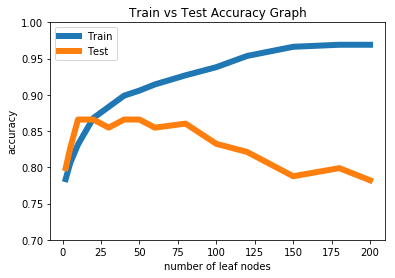

In [59]:
###
### Finally draw a line plot similar to the Train/Test Performance graph shown above
### On x-axis you would have max_leaf_nodes 
### On y-axis you would have error rate
### There would be 2 lines on graph; one for training error and other for testing error
### 
### Write your code here
trainlist=[train_2 , train_5 , train_10 , train_20 , train_30 , train_40 , train_50 , train_60 , train_80 , train_100 , train_120 , train_150 , train_180 , train_200 ]

testlist=[test_2 , test_5 , test_10 , test_20 , test_30 , test_40 , test_50 , test_60 , test_80 , test_100 , test_120 , test_150 , test_180 , test_200 ]
x=[2,5,10,20,30,40,50,60,80,100,120,150,180,200]
plt.plot(x,trainlist , linewidth=6 , label='Train' )
plt.plot(x,testlist , linewidth=6 , label='Test' )
plt.title('Train vs Test Accuracy Graph') 
plt.legend()
plt.xlabel("number of leaf nodes")
plt.ylabel("accuracy")
plt.ylim(0.7, 1)


plt.show()

#### Max Depth Parameter in Decision Tree

In [60]:
###
### In the DecisionTreeClassifier() module there is a paramter called max_depth
### We will alter this parameter to see how training and testing accuracy varies.
### Leave rest of the parameters to default
### 
### Train several decision tree classifiers on different values of max_depth.
### You could start from 2, 3, 4, 5, ...  or any order you think is suitable.
### 
### For each Classifier report training and testing accuracy.
### Save these values in two separate lists
###
### Write your code here
###

In [61]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_2=accuracy_score(Y_train, classifier.predict(X_train))
test_2=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_2)
print('Testing Acc: ',test_2)

Training Acc:  0.7837078651685393
Testing Acc:  0.7988826815642458


In [62]:
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_4=accuracy_score(Y_train, classifier.predict(X_train))
test_4=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_4)
print('Testing Acc: ',test_4)

Training Acc:  0.8356741573033708
Testing Acc:  0.8659217877094972


In [63]:
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_6=accuracy_score(Y_train, classifier.predict(X_train))
test_6=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_6)
print('Testing Acc: ',test_6)

Training Acc:  0.8609550561797753
Testing Acc:  0.8435754189944135


In [64]:
classifier = DecisionTreeClassifier(max_depth=8)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_8=accuracy_score(Y_train, classifier.predict(X_train))
test_8=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_8)
print('Testing Acc: ',test_8)

Training Acc:  0.8932584269662921
Testing Acc:  0.8379888268156425


In [65]:
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_10=accuracy_score(Y_train, classifier.predict(X_train))
test_10=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_10)
print('Testing Acc: ',test_10)

Training Acc:  0.9199438202247191
Testing Acc:  0.8268156424581006


In [66]:
classifier = DecisionTreeClassifier(max_depth=12)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_12=accuracy_score(Y_train, classifier.predict(X_train))
test_12=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_12)
print('Testing Acc: ',test_12)

Training Acc:  0.9339887640449438
Testing Acc:  0.8212290502793296


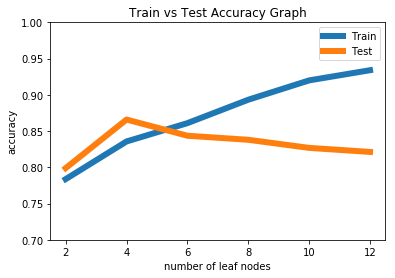

In [68]:
###
### Finally draw a line plot similar to the Train/Test Performance graph shown above
### On x-axis you would have max_depth 
### On y-axis you would have error rate
### There would be 2 lines on graph; one for training error and other for testing error
### 
### Write your code here 
trainlist=[train_2 , train_4 , train_6 , train_8, train_10 , train_12 ]

testlist=[test_2 , test_4 , test_6 , test_8 , test_10 , test_12]
x=[2,4,6,8,10,12]
plt.plot(x,trainlist , linewidth=6 , label='Train' )
plt.plot(x,testlist , linewidth=6 , label='Test' )
plt.title('Train vs Test Accuracy Graph') 
plt.legend()
plt.xlabel("number of leaf nodes")
plt.ylabel("accuracy")
plt.ylim(0.7, 1)


plt.show()
###

#### Max Samples Leaf Parameter in Decision Tree

In [69]:
###
### In the DecisionTreeClassifier() module there is a paramter called min_samples_leaf
### We will alter this parameter to see how training and testing accuracy varies.
### Leave rest of the parameters to default
### 
### Train several decision tree classifiers on different values of min_samples_leaf.
### You could start from 2, 5, 10, 20, 30, 40 or any order you think is suitable.
### 
### For each Classifier report training and testing accuracy.
### Save these values in two separate lists
###
### Write your code here
###

In [70]:
classifier = DecisionTreeClassifier(min_samples_leaf=2)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_2=accuracy_score(Y_train, classifier.predict(X_train))
test_2=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_2)
print('Testing Acc: ',test_2)

Training Acc:  0.9087078651685393
Testing Acc:  0.8324022346368715


In [71]:
classifier = DecisionTreeClassifier(min_samples_leaf=5)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_5=accuracy_score(Y_train, classifier.predict(X_train))
test_5=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_5)
print('Testing Acc: ',test_5)

Training Acc:  0.8778089887640449
Testing Acc:  0.8212290502793296


In [72]:
classifier = DecisionTreeClassifier(min_samples_leaf=10)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_10=accuracy_score(Y_train, classifier.predict(X_train))
test_10=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_10)
print('Testing Acc: ',test_10)

Training Acc:  0.8469101123595506
Testing Acc:  0.8324022346368715


In [73]:
classifier = DecisionTreeClassifier(min_samples_leaf=20)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_20=accuracy_score(Y_train, classifier.predict(X_train))
test_20=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_20)
print('Testing Acc: ',test_20)

Training Acc:  0.8202247191011236
Testing Acc:  0.8044692737430168


In [74]:
classifier = DecisionTreeClassifier(min_samples_leaf=30)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_30=accuracy_score(Y_train, classifier.predict(X_train))
test_30=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_30)
print('Testing Acc: ',test_30)

Training Acc:  0.8089887640449438
Testing Acc:  0.8324022346368715


In [75]:
classifier = DecisionTreeClassifier(min_samples_leaf=40)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_40=accuracy_score(Y_train, classifier.predict(X_train))
test_40=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_40)
print('Testing Acc: ',test_40)

Training Acc:  0.8075842696629213
Testing Acc:  0.8268156424581006


In [76]:
classifier = DecisionTreeClassifier(min_samples_leaf=50)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_50=accuracy_score(Y_train, classifier.predict(X_train))
test_50=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_50)
print('Testing Acc: ',test_50)

Training Acc:  0.7991573033707865
Testing Acc:  0.8324022346368715


In [77]:
classifier = DecisionTreeClassifier(min_samples_leaf=60)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_60=accuracy_score(Y_train, classifier.predict(X_train))
test_60=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_60)
print('Testing Acc: ',test_60)

Training Acc:  0.797752808988764
Testing Acc:  0.8324022346368715


In [78]:
classifier = DecisionTreeClassifier(min_samples_leaf=70)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_70=accuracy_score(Y_train, classifier.predict(X_train))
test_70=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_70)
print('Testing Acc: ',test_70)

Training Acc:  0.7837078651685393
Testing Acc:  0.7988826815642458


In [79]:
classifier = DecisionTreeClassifier(min_samples_leaf=80)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_80=accuracy_score(Y_train, classifier.predict(X_train))
test_80=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_80)
print('Testing Acc: ',test_80)

Training Acc:  0.7837078651685393
Testing Acc:  0.7988826815642458


In [80]:
classifier = DecisionTreeClassifier(min_samples_leaf=90)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_90=accuracy_score(Y_train, classifier.predict(X_train))
test_90=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_90)
print('Testing Acc: ',test_90)

Training Acc:  0.7837078651685393
Testing Acc:  0.7988826815642458


In [81]:
classifier = DecisionTreeClassifier(min_samples_leaf=100)
classifier.fit(X_train, Y_train)
training_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
train_100=accuracy_score(Y_train, classifier.predict(X_train))
test_100=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train_100)
print('Testing Acc: ',test_100)

Training Acc:  0.7837078651685393
Testing Acc:  0.7988826815642458


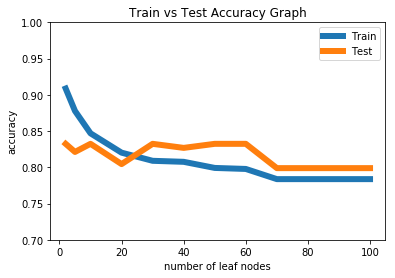

In [84]:
###
### Finally draw a line plot similar to the Train/Test Performance graph shown above
### On x-axis you would have min_samples_leaf 
### On y-axis you would have error rate
### There would be 2 lines on graph; one for training error and other for testing error
### 
### Write your code here 
trainlist=[train_2 , train_5 , train_10 , train_20, train_30 , train_40 , train_50 , train_60, train_70 , train_80 , train_90 , train_100  ]

testlist=[test_2 , test_5 , test_10 , test_20 , test_30 , test_40 , test_50 , test_60 , test_70 , test_80 , test_90 , test_100]
x=[2,5,10,20,30,40,50,60,70,80,90,100]
plt.plot(x,trainlist , linewidth=6 , label='Train' )
plt.plot(x,testlist , linewidth=6 , label='Test' )
plt.title('Train vs Test Accuracy Graph') 
plt.legend()
plt.xlabel("number of leaf nodes")
plt.ylabel("accuracy")
plt.ylim(0.7, 1)


plt.show()
###

#### Decision Tree vs Random Forest

From the above discussion, it is clear that Decision Tree are prone to over-fitting. One way of handling over-fitting is to use **Random Forests.**


Random forests are an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. Random decision forests correct for decision trees habit of overfitting to their training set.

Random forests are a **must know** ensemble classifier for data scientist. You can read more about Ensemble classifiers and Random forests on the internet to get a better understanding of their working.

In [85]:
###
### Using sklearn
### Train a random forest classifier on training data
### For your own understanding, you can play around by changing the parameters as you did with decision tree.
### For this homework, leave the parameters to default.
###
### Write your code here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

###

C:\Users\satmap\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
training_predictions_random_forest = classifier.predict(X_train)
testing_predictions_random_forest = classifier.predict(X_test)

In [87]:
###
### Report your training and testing accuracy
### i.e. 
### Training Accuracy = ???
### Testing Accuracy = ???

train=accuracy_score(Y_train, classifier.predict(X_train))
test=accuracy_score(Y_test, classifier.predict(X_test))
print('Training Acc: ',train)
print('Testing Acc: ',test)
###

Training Acc:  0.9508426966292135
Testing Acc:  0.8100558659217877


#### Comparison

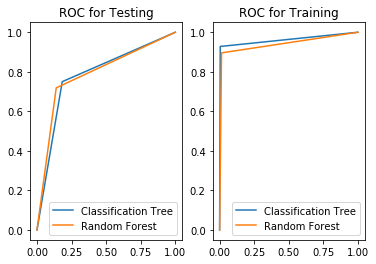

In [88]:
###
### Plot a graph that clearly shows the testing accuracy comparison of Decision Tree with Random Forest.
### It should be properly labeled and intuitive.
###


from sklearn import metrics

plt.subplot(1,2,1)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, testing_predictions_classification_tree)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, testing_predictions_random_forest)
plt.plot(fpr, tpr)
plt.title('ROC for Testing')
plt.legend(['Classification Tree','Random Forest'])

plt.subplot(1,2,2)
fpr, tpr, thresholds = metrics.roc_curve(Y_train, training_predictions_classification_tree)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(Y_train, training_predictions_random_forest)
plt.plot(fpr, tpr)
plt.title('ROC for Training')
plt.legend(['Classification Tree','Random Forest'])